In [1]:
import xml.etree.ElementTree as ET
from astropy.table import Table
from dateutil.parser import parse
import pylab
tree = ET.parse('apple_health_export/export.xml')
root = tree.getroot()

In [2]:
wanted = [ ( 'creationDate', parse), ('value',float), ('unit',str) ]

table = Table(
    [
        { akey: mytype(elem.attrib[akey]) for akey,mytype in wanted }
        for elem in root.findall("./Record[@type='HKQuantityTypeIdentifierBodyTemperature']")
    ]
)

In [3]:
events = [
    ("2021-05-12 14:00:00-07:00", "Vaccine shot"),
    ("2021-05-12 17:00:00-07:00", "Beer time!"),
    ("2021-05-12 21:07:00-07:00", "Arm pain"),
    ("2021-05-13 00:41:00-07:00", "Felt cold"),    
    ("2021-05-13 10:03:00-07:00", "Tylenol"),
    ("2021-05-13 16:18:00-07:00", "Tylenol"),
    ("2021-05-13 23:38:00-07:00", "Tylenol"),
    ("2021-05-14 09:00:00-07:00", "Back to work")
]

Text(0.5, 1.0, 'Body temp trending after Moderna 2nd dose')

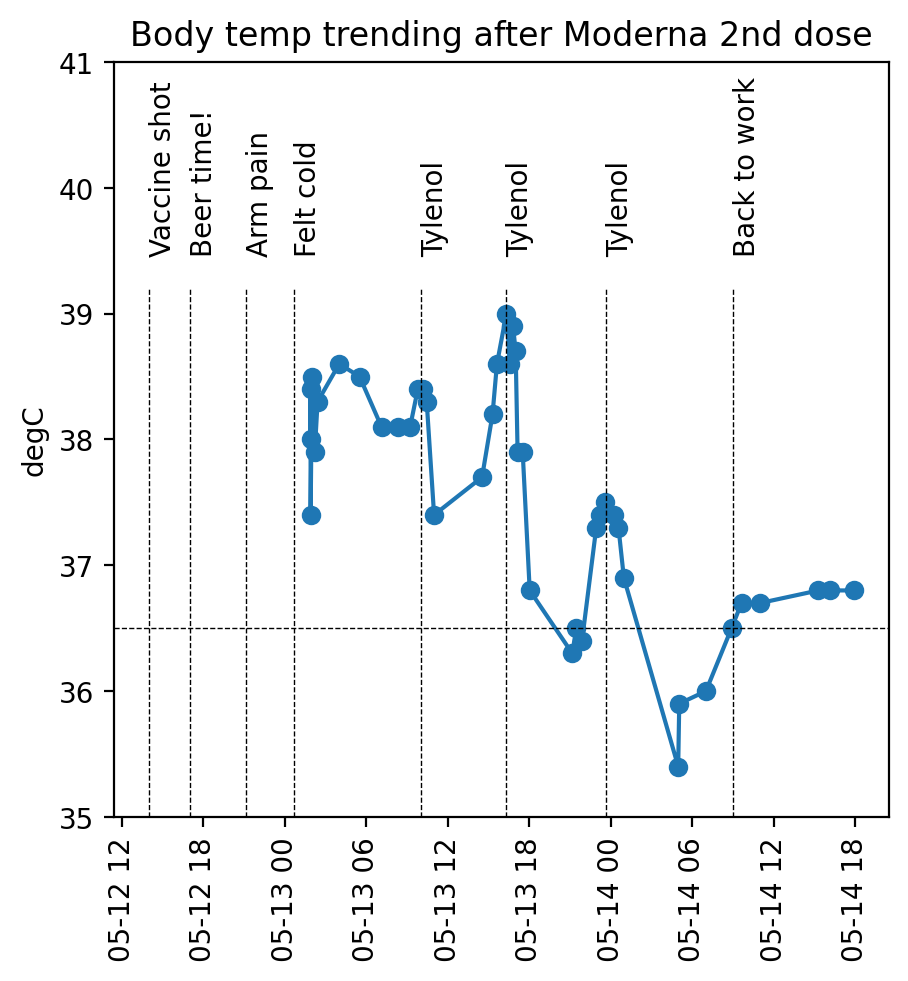

In [4]:
fig = pylab.figure(figsize=(5,5),dpi=200,facecolor="w")

ymax = 41
ymin = 35.0
ymidpt = 0.75
ymid = (ymax-ymin)*ymidpt+ymin
pylab.xticks(rotation=90)
pylab.plot(table["creationDate"],table["value"],"o-")
for anevent in events:
    pylab.axvline(parse(anevent[0]),ymax=ymidpt-0.05, c="k",linestyle="--",linewidth=0.5)
    pylab.annotate(anevent[1],(parse(anevent[0]),ymid),xycoords="data",rotation=90)

pylab.ylabel("degC")
pylab.axhline(36.5, c="k",linestyle="--",linewidth=0.5)
pylab.ylim(ymin,ymax)
pylab.title("Body temp trending after Moderna 2nd dose")
